In [20]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

w0 = 1.0 

def f1(x,y):
#    return y
    return x - (x**2+y**2)*(x-y)

def f2(x,y):
#    return -(w0**2)*x
    return y - (x**2+y**2)*(x+y)

def fillValues(x, size, Step):
    x.append(0)
    for i in range(size - 1):
        x.append(x[i] + Step)

def minmod(a,b):
    if a*b <= 0:
        return 0
    elif (a > 0) and (b > 0):
        return min(a, b)
    elif (a < 0) and (b < 0):
        return max(a, b)
    
def maxmod(a,b):
    if a*b <= 0:
        return 0
    elif (a > 0) and (b > 0):
        return max(a, b)
    elif (a < 0) and (b < 0):
        return min(a, b)
    
def g(x,y,z):
    #return maxmod(minmod(2*(z-y), y-x), minmod(z-y, 2*(y-x)))
    return (z-x)*max(0,(z-y)*(y-x))/((z-y)**2 + (y-x)**2 + 10**(-14))

def G1(a,b,c,d):
    return g(a, b, c)-g(d, a, b)

def U0(x):
    #return np.sin(2*pi*x/L)
    return np.sin(x)

def V0(x):
    #return np.sin(2*pi*x/L)
    return np.sin(x)
    #return np.cos(x)

c1 = 1.0
c2 = 1.0
L = 10*pi
T = 200.
gridWidth = 450
gridHeight = 3000
xStep = L/gridWidth
tau = T/gridHeight 
Q1 = c1*tau/xStep
Q2 = c2*tau/xStep

D = np.sqrt((c1-c2)**2 + 4*w0**2)
w_plus_1 = (-c1-c2+D)/2
w_plus_minus_1 = (c1+c2+D)/2
w_minus_1 = (-c1-c2-D)/2
w_minus_minus_1 = (c1+c2-D)/2

if (Q1 < 1) and (Q2 < 1):
    print("ЕСТЬ СХОДИМОСТЬ")
else:
    print("НЕТ СХОДИМОСТИ")
print Q1, Q2, tau, xStep

ЕСТЬ СХОДИМОСТЬ
0.954929658551 0.954929658551 0.0666666666667 0.0698131700798


In [21]:
x = []
t = []

fillValues(x, gridWidth, xStep)
fillValues(t, gridHeight, tau)

U = np.zeros((gridWidth,gridHeight))
V = np.zeros((gridWidth, gridHeight))
U_real = np.zeros((gridWidth,gridHeight))
U_real_cos = np.zeros((gridWidth,gridHeight))
U_real_1 = np.zeros((gridWidth,gridHeight))
V_real = np.zeros((gridWidth,gridHeight))
V_real_1 = np.zeros((gridWidth,gridHeight))

for j in range(gridHeight):
    for i in range(gridWidth):
        #U_real_cos[i,j] = ((1-c1+w_plus_minus_1)*np.sin(x[i]+w_plus_1*t[j]) + (w_plus_1+c1-1)*np.sin(x[i]-w_plus_minus_1*t[j]))/D
        U_real[i,j] = ((c2-c1+D)/2.*np.sin(x[i]+w_plus_1*t[j]) + (c1-c2+D)/2.*np.sin(x[i]-w_plus_minus_1*t[j]) + np.cos(x[i]-w_plus_minus_1*t[j]) - np.cos(x[i]+w_plus_1*t[j]))/D
        V_real[i,j] = ((w_plus_1+c1)*np.sin(x[i]+w_plus_1*t[j]) + (w_plus_minus_1-c1)*np.sin(x[i]-w_plus_minus_1*t[j]) + (w_plus_1+c1)*(c2-c1+D)/2.*np.cos(x[i]+w_plus_1*t[j]) + (w_plus_minus_1-c1)*(c2-c1-D)/2.*np.cos(x[i]-w_plus_minus_1*t[j]))/D
        #U_real_1[i,j] = U0(x[i] - c1*t[j])*np.cos(w0*t[j]) + V0(x[i] - c2*t[j])*np.sin(w0*t[j])/w0
        #V_real_1[i,j] = -w0*U0(x[i] - c1*t[j])*np.sin(w0*t[j]) + V0(x[i] - c2*t[j])*np.cos(w0*t[j])

for i in range(gridWidth):
    U[i,0] = U0(x[i])
    V[i,0] = V0(x[i])
    
#for j in range(gridHeight):
#    U[0,j] = U_real[0,j]
#    V[0,j] = V_real[0,j]
    
#Первый порядок аппроксимации
for j in range(gridHeight - 1):
    for i in range(2, gridWidth - 1):
        U[i,j+1] = (1 - Q1)*U[i,j] + Q1*U[i - 1,j] + Q1*(Q1-1)/2*G1(U[i-1,j], U[i,j], U[i+1,j], U[i-2,j])
        V[i,j+1] = (1 - Q2)*V[i,j] + Q2*V[i - 1,j] + Q2*(Q2-1)/2*G1(V[i-1,j], V[i,j], V[i+1,j], V[i-2,j])
    U[gridWidth-1,j+1] = (1 - Q1)*U[gridWidth-1,j] + Q1*U[gridWidth - 2,j] + Q1*(Q1-1)/2*G1(U[gridWidth-2,j], U[gridWidth-1,j], U[0,j], U[-3,j])
    V[gridWidth-1,j+1] = (1 - Q2)*V[gridWidth-1,j] + Q2*V[gridWidth - 2,j] + Q2*(Q2-1)/2*G1(V[gridWidth-2,j], V[gridWidth-1,j], V[0,j], V[-3,j])
    U[0,j+1] = (1 - Q1)*U[0,j] + Q1*U[-1,j] + Q1*(Q1-1)/2*G1(U[-1,j], U[0,j], U[1,j], U[-2,j])
    U[1,j+1] = (1 - Q1)*U[1,j] + Q1*U[0,j] + Q1*(Q1-1)/2*G1(U[0,j], U[1,j], U[2,j], U[-1,j])
    V[0,j+1] = (1 - Q2)*V[0,j] + Q2*V[-1,j] + Q2*(Q2-1)/2*G1(V[-1,j], V[0,j], V[1,j], V[-2,j])
    V[1,j+1] = (1 - Q2)*V[1,j] + Q2*V[0,j] + Q2*(Q2-1)/2*G1(V[0,j], V[1,j], V[2,j], V[-1,j])
    for i in range(gridWidth):
        Kx1 = f1(U[i,j+1], V[i,j+1])
        Ky1 = f2(U[i,j+1], V[i,j+1])
        Kx2 = f1(U[i,j+1] + 0.5*tau*Kx1, V[i,j+1] + 0.5*tau*Ky1)
        Ky2 = f2(U[i,j+1] + 0.5*tau*Kx1, V[i,j+1] + 0.5*tau*Ky1)
        Kx3 = f1(U[i,j+1] + 0.5*tau*Kx2, V[i,j+1] + 0.5*tau*Ky2)
        Ky3 = f2(U[i,j+1] + 0.5*tau*Kx2, V[i,j+1] + 0.5*tau*Ky2)
        Kx4 = f1(U[i,j+1] + tau*Kx3, V[i,j+1] + tau*Ky3)
        Ky4 = f2(U[i,j+1] + tau*Kx3, V[i,j+1] + tau*Ky3)
        U[i,j+1] = U[i,j+1] + tau/6.*(Kx1 + 2*Kx2 + 2*Kx3 + Kx4)
        V[i,j+1] = V[i,j+1] + tau/6.*(Ky1 + 2*Ky2 + 2*Ky3 + Ky4)

#Второй порядок аппроксимации
#for j in range(gridHeight - 1):
#    for i in range(2, gridWidth - 1):
#        U[i,j+1] = (1 - Q1/2)*U[i,j] + Q1/2*U[i-1,j] + Q1/2*(Q1/2-1)/2*G1(U[i-1,j], U[i,j], U[i+1,j], U[i-2,j])
#        V[i,j+1] = (1 - Q2/2)*V[i,j] + Q2/2*V[i-1,j] + Q2/2*(Q2/2-1)/2*G1(V[i-1,j], V[i,j], V[i+1,j], V[i-2,j])
#    U[gridWidth-1,j+1] = (1 - Q1/2)*U[gridWidth-1,j] + Q1/2*U[gridWidth-2,j] + Q1/2*(Q1/2-1)/2*G1(U[gridWidth-2,j], U[gridWidth-1,j], U[0,j], U[-3,j])
#    V[gridWidth-1,j+1] = (1 - Q2/2)*V[gridWidth-1,j] + Q2/2*V[gridWidth - 2,j] + Q2/2*(Q2/2-1)/2*G1(V[gridWidth-2,j], V[gridWidth-1,j], V[0,j], V[-3,j])
#    U[0,j+1] = (1 - Q1/2)*U[0,j] + Q1/2*U[-1,j] + Q1/2*(Q1/2-1)/2*G1(U[-1,j], U[0,j], U[1,j], U[-2,j])
#    U[1,j+1] = (1 - Q1/2)*U[1,j] + Q1/2*U[0,j] + Q1/2*(Q1/2-1)/2*G1(U[0,j], U[1,j], U[2,j], U[-1,j])
#    V[0,j+1] = (1 - Q2/2)*V[0,j] + Q2/2*V[-1,j] + Q2/2*(Q2/2-1)/2*G1(V[-1,j], V[0,j], V[1,j], V[-2,j])
#    V[1,j+1] = (1 - Q2/2)*V[1,j] + Q2/2*V[0,j] + Q2/2*(Q2/2-1)/2*G1(V[0,j], V[1,j], V[2,j], V[-1,j])
#    for i in range(gridWidth):
#        Kx1 = f1(U[i,j+1], V[i,j+1])
#        Ky1 = f2(U[i,j+1], V[i,j+1])
#        Kx2 = f1(U[i,j+1] + 0.5*tau*Kx1, V[i,j+1] + 0.5*tau*Ky1)
#        Ky2 = f2(U[i,j+1] + 0.5*tau*Kx1, V[i,j+1] + 0.5*tau*Ky1)
#        Kx3 = f1(U[i,j+1] + 0.5*tau*Kx2, V[i,j+1] + 0.5*tau*Ky2)
#        Ky3 = f2(U[i,j+1] + 0.5*tau*Kx2, V[i,j+1] + 0.5*tau*Ky2)
#        Kx4 = f1(U[i,j+1] + tau*Kx3, V[i,j+1] + tau*Ky3)
#        Ky4 = f2(U[i,j+1] + tau*Kx3, V[i,j+1] + tau*Ky3)
#        U[i,j+1] = U[i,j+1] + tau/6.*(Kx1 + 2*Kx2 + 2*Kx3 + Kx4)
#        V[i,j+1] = V[i,j+1] + tau/6.*(Ky1 + 2*Ky2 + 2*Ky3 + Ky4)
#    X = U[:,j+1]
#    Y = V[:,j+1]
#    for i in range(2, gridWidth - 1):
#        U[i,j+1] = (1 - Q1/2)*X[i] + Q1/2*X[i-1] + Q1/2*(Q1/2-1)/2*G1(X[i-1], X[i], X[i+1], X[i-2])
#        V[i,j+1] = (1 - Q2/2)*Y[i] + Q2/2*Y[i-1] + Q2/2*(Q2/2-1)/2*G1(Y[i-1], Y[i], Y[i+1], Y[i-2])
#    U[gridWidth-1,j+1] = (1 - Q1/2)*X[gridWidth-1] + Q1/2*X[gridWidth-2] + Q1/2*(Q1/2-1)/2*G1(X[gridWidth-2], X[gridWidth-1], X[0], X[-3])
#    V[gridWidth-1,j+1] = (1 - Q2/2)*Y[gridWidth-1] + Q2/2*Y[gridWidth-2] + Q2/2*(Q2/2-1)/2*G1(Y[gridWidth-2], Y[gridWidth-1], Y[0], Y[-3])
#    U[0,j+1] = (1 - Q1/2)*X[0] + Q1/2*X[-1] + Q1/2*(Q1/2-1)/2*G1(X[-1], X[0], X[1], X[-2])
#    U[1,j+1] = (1 - Q1/2)*X[1] + Q1/2*X[0] + Q1/2*(Q1/2-1)/2*G1(X[0], X[1], X[2], X[-1])
#    V[0,j+1] = (1 - Q2/2)*Y[0] + Q2/2*Y[-1] + Q2/2*(Q2/2-1)/2*G1(Y[-1], Y[0], Y[1], Y[-2])
#    V[1,j+1] = (1 - Q2/2)*Y[1] + Q2/2*Y[0] + Q2/2*(Q2/2-1)/2*G1(Y[0], Y[1], Y[2], Y[-1])

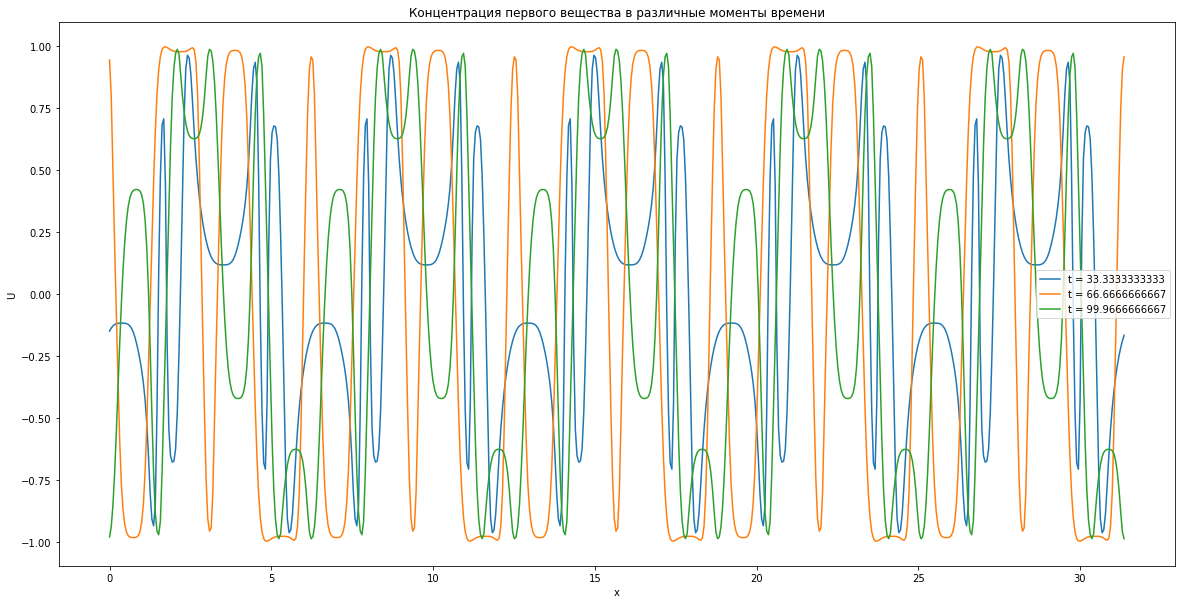

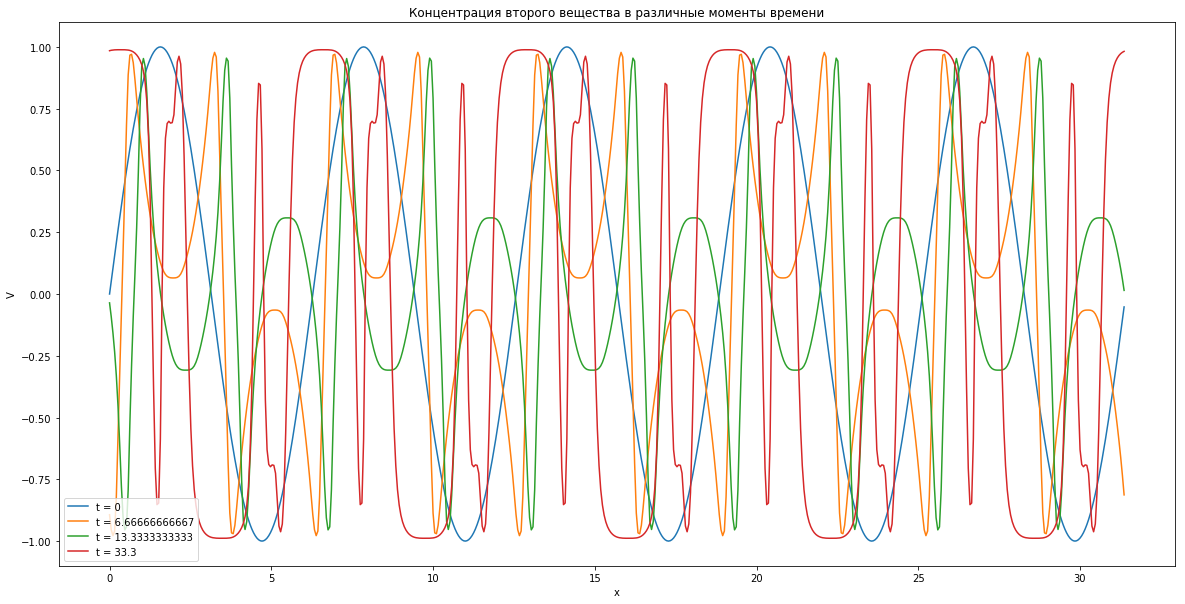

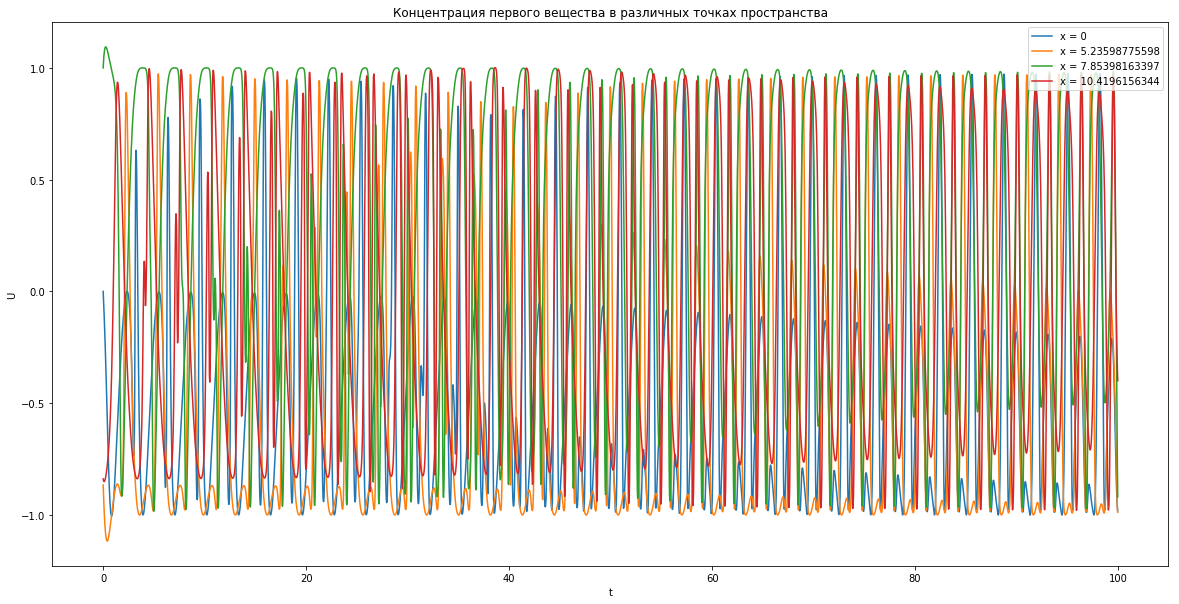

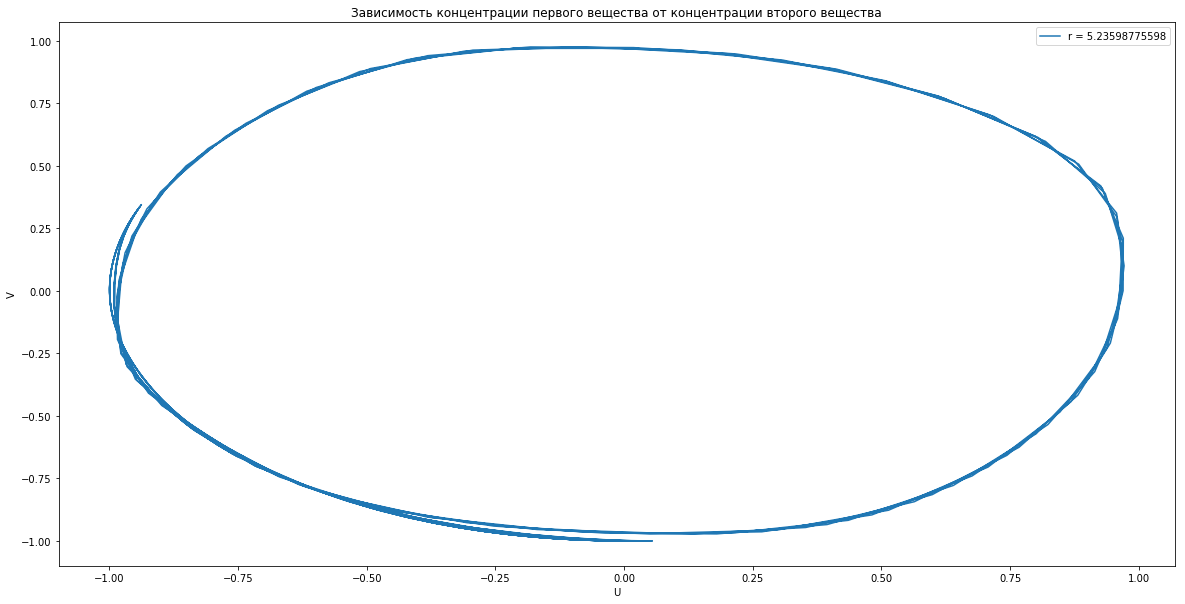

In [15]:
plt.figure(figsize = (20,10))
for i in (1000, 2000, 2999):
    plt.plot(x, U[:, i], label='t = %s'%t[i])
    #plt.plot(x, U_real[:, i], label='t = %s'%t[i])
    #plt.plot(x_1, U_1[:, i*2], label='t = %s'%t_1[i*2])
    plt.title(u'Концентрация первого вещества в различные моменты времени')
    plt.legend(loc = 'best')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()

plt.figure(figsize = (20,10))
for i in (0, 200, 400, 999):
    plt.plot(x, V[:, i], label='t = %s'%t[i])
    #plt.plot(x, V_real[:, i], label='t = %s'%t[i])
    #plt.plot(x_1, V_1[:, i*2], label='t = %s'%t_1[i*2])
    plt.title(u'Концентрация второго вещества в различные моменты времени')
    plt.legend(loc = 'best')
    plt.xlabel('x')
    plt.ylabel('V')
plt.show()

plt.figure(figsize = (20,10))
for i in (0, 100, 150, 199):
    plt.plot(t, U[i, :], label='x = %s'%x[i])
    #plt.scatter(t, U_real[i, :], label='t = %s'%t[i])
    plt.title(u'Концентрация первого вещества в различных точках пространства')
    plt.legend(loc = 'best')
    plt.xlabel('t')
    plt.ylabel('U')
plt.show()

plt.figure(figsize = (20,10))
plt.plot(U[100,2500:], V[100, 2500:], label='r = %s'%x[100])
plt.title(u'Зависимость концентрации первого вещества от концентрации второго вещества')
plt.legend(loc = 'best')
plt.xlabel('U')
plt.ylabel('V')
plt.show()